### **Preparation du fichier / Analyse**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("TESA_RAW.csv")

# Rename columns
df.columns = ["colum1", "colum2", "Label", "Text"]

# Drop the first two columns
df.drop(columns=["colum1", "colum2"], inplace=True)

# Count total rows before removing duplicates
initial_rows = len(df)

# Remove duplicate rows based on the "Text" column
df.drop_duplicates(subset=["Text"], keep="first", inplace=True)

# Count total rows after removing duplicates
final_rows = len(df)

# Calculate number of deleted rows
deleted_rows = initial_rows - final_rows

print(f"Processing complete: First two columns removed, {deleted_rows} duplicate(s) deleted")


Processing complete: First two columns removed, 5190 duplicate(s) deleted


Sentiment Distribution:
 Label
Negative      21166
Positive      19066
Neutral       17043
Irrelevant    12216
Name: count, dtype: int64


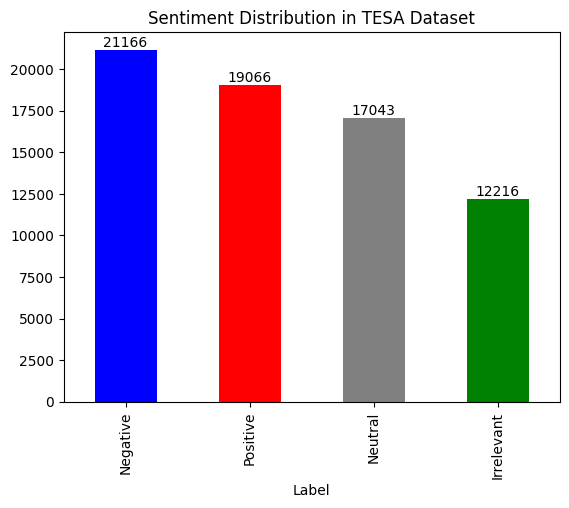

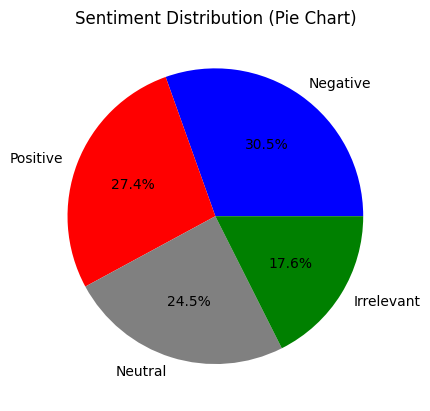

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 4 ratings
colors = ["blue", "red", "gray", "green"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in TESA Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart)")
plt.ylabel("")
#plt.savefig("pie_chart.png")
print("\n")
plt.show()


In [ ]:
# Replace 'Positive' with 'POS' and 'Negative' with 'NEG' in the 'Label' column
df['Label'] = df['Label'].replace({'Positive': 'POS', 'Negative': 'NEG'})

# Keep only rows where 'Label' contains either 'POS' or 'NEG'
df = df[df['Label'].isin(['POS', 'NEG'])]


Sentiment Distribution:
 Label
NEG    21166
POS    19066
Name: count, dtype: int64


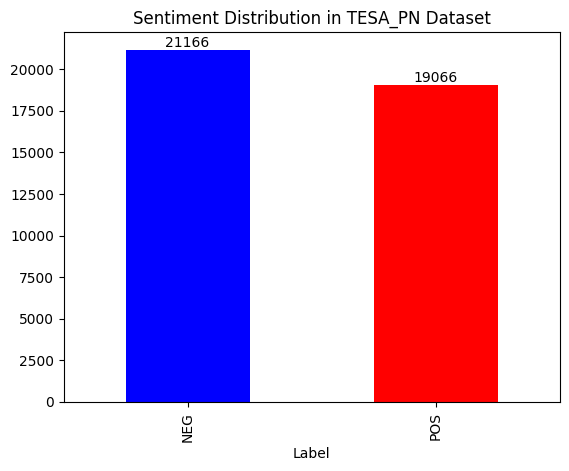

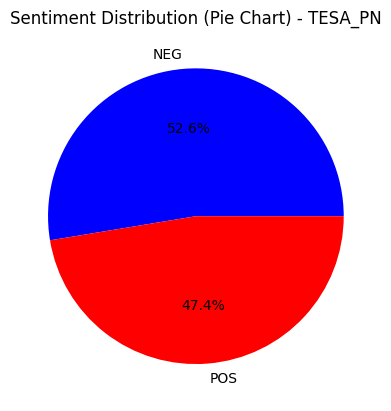

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 2 ratings
colors = ["blue", "red"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in TESA_PN Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart_pn.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart) - TESA_PN")
plt.ylabel("")
#plt.savefig("pie_chart_pn.png")
print("\n")
plt.show()


In [ ]:
# Convert POS → 1 and NEG → 0
df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})

df.to_csv("TESA.csv", index=False)

print("Updated dataset saved as TESA.csv")


Updated dataset saved as TESA.csv


<ipython-input-5-1f8f98697c04>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})


### **Pretraitement**

In [ ]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_user_tags(text):
    if isinstance(text, str):
        # First case: @ followed by space and a word
        text = re.sub(r'@ \S+', '', text)
        # Second case: @ directly followed by a word
        text = re.sub(r'@\S+', '', text)
        return text
    return ''

def remove_pic_noise(text):
    if isinstance(text, str):
        # Remove "pic.XXXX" and handle optional spaces before "/"
        return re.sub(r'pic\.\S+(\s*/\s*\S+)?', '', text).strip()
    return text

def convert_to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    return ''

def remove_non_latin(text):
    if isinstance(text, str):
        return re.sub(r'[^a-z\s]', ' ', text)  # Replace non-latin characters with a space
    return ''

def tokenization(text):
    if isinstance(text, str):
        return re.findall(r'\S+', text)  # Matches sequences of non-space characters
    return []

def remove_ENG_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return []

def get_root(word, stemmer):
    if isinstance(word, str):
        return stemmer.stem(word)
    return word

def stemming_ENG(tokens):
    stemmer = PorterStemmer()
    return [get_root(token, stemmer) for token in tokens]

def rejoin_tokens(tokens):
    filtered_tokens = [token for token in tokens if isinstance(token, str) and token.strip()]
    return ' '.join(filtered_tokens)

In [ ]:
def TESA_pretraitement(text):
    if isinstance(text, str):
        # Step 2: Remove user tags (e.g., @username)
        text = remove_user_tags(text)

        # Step 3: Remove picture noise (e.g., "pic.XXX/XXX")
        text = remove_pic_noise(text)

        # Step 4: Convert to lowercase
        text = convert_to_lowercase(text)

        # Step 5: Remove non-latin characters
        text = remove_non_latin(text)

        # Step 6: Tokenization (split text into tokens)
        tokens = tokenization(text)

        # Step 7: Remove English stopwords
        tokens = remove_ENG_stopwords(tokens)

        # Step 8: Apply stemming (Porter Stemmer for English)
        tokens = stemming_ENG(tokens)

        # Step 9: Rejoin tokens into a single string
        return rejoin_tokens(tokens)

    return ''

In [ ]:
print(f"Start processing TESA ...\n")
TESA = pd.read_csv("/content/TESA.csv")
TESA["Text"] = [TESA_pretraitement(text) for text in df["Text"]]
TESA.to_csv("/content/TESA_Pre.csv", index=False)
print(f"Finished processing TESA!\n")

Start processing TESA ...

Finished processing TESA!

